In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('loan_data.csv')

In [4]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(381, 13)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [8]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,54,3,57
1.0,52,242,294
All,106,245,351


<Axes: >

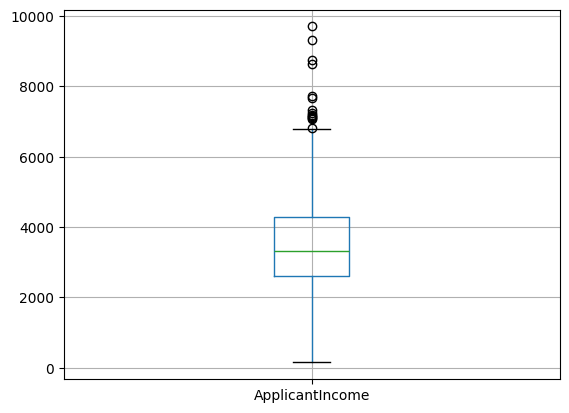

In [9]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

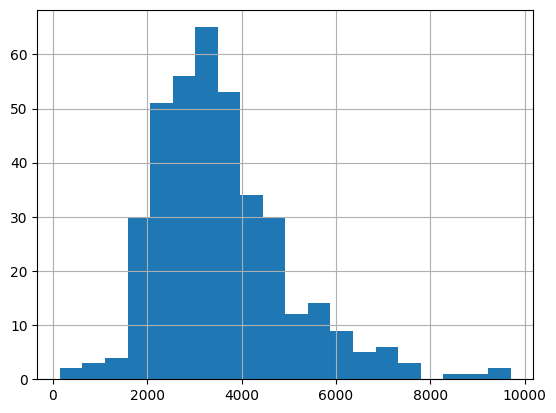

In [10]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

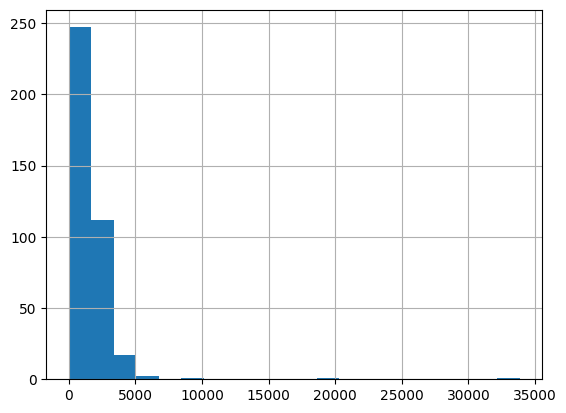

In [11]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

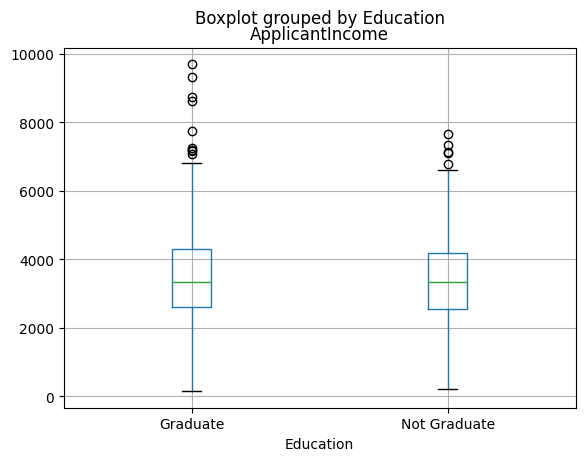

In [12]:
dataset.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

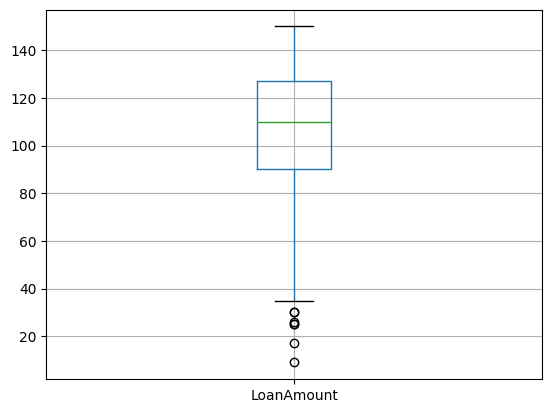

In [13]:
dataset.boxplot(column='LoanAmount')

<Axes: >

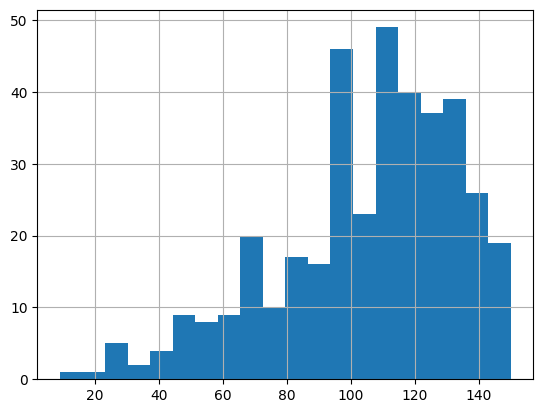

In [14]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

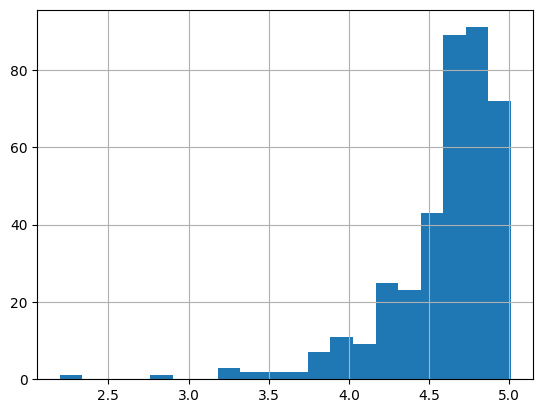

In [15]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [16]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
LoanAmount_log        0
dtype: int64

In [17]:
dataset['Gender'] = dataset['Gender'].fillna(dataset['Gender'].mode()[0])

In [18]:
dataset['Dependents'] = dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

In [19]:
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])

In [20]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [21]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])

In [22]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0])

In [23]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [24]:
dataset['TotalIncome']= dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<Axes: >

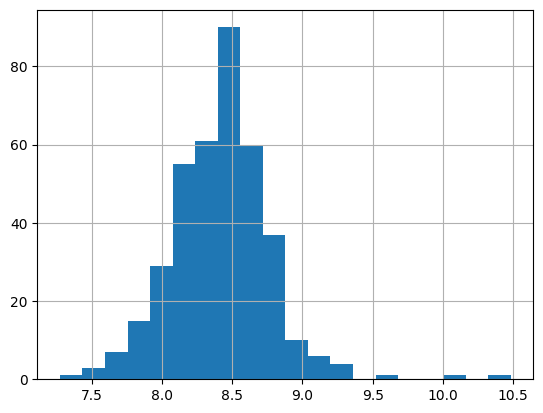

In [25]:
dataset['TotalIncome_log'].hist(bins=20)

In [26]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569


In [27]:
X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
Y= dataset.iloc[:,12].values

In [28]:
X

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 4941.0],
       ...,
       ['Female', 'No', '0', ..., 1.0, 4.2626798770413155, 2900.0],
       ['Male', 'Yes', '3+', ..., 1.0, 3.6888794541139363, 4106.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(381, 8), dtype=object)

In [29]:
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.653960350157523 4625.0]
 ['Male' 'Yes' '3+' ... 1.0 4.727387818712341 3095.0]
 ['Male' 'No' '0' ... 1.0 4.2626798770413155 3069.0]
 ...
 ['Male' 'No' '0' ... 1.0 4.787491742782046 4191.0]
 ['Female' 'No' '0' ... 0.0 4.7535901911063645 4166.0]
 ['Male' 'Yes' '1' ... 1.0 4.74493212836325 4592.0]]


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [33]:
for i in range(0,5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [34]:
X_train[:,7]= labelencoder_X.fit_transform(X_train[:,7])

In [35]:
X_train

array([[1, 1, 0, ..., 1.0, 4.653960350157523, 142],
       [1, 1, 3, ..., 1.0, 4.727387818712341, 34],
       [1, 0, 0, ..., 1.0, 4.2626798770413155, 32],
       ...,
       [1, 0, 0, ..., 1.0, 4.787491742782046, 106],
       [0, 0, 0, ..., 0.0, 4.7535901911063645, 105],
       [1, 1, 1, ..., 1.0, 4.74493212836325, 136]],
      shape=(304, 8), dtype=object)

In [36]:
labelencoder_Y = LabelEncoder()
Y_train= labelencoder_Y.fit_transform(Y_train)

In [37]:
Y_train

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [38]:
for i in range(0,5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [39]:
X_test[:,7]= labelencoder_X.fit_transform(X_test[:,7])

In [40]:
labelencoder_Y = LabelEncoder()
Y_test= labelencoder_Y.fit_transform(Y_test)

In [41]:
X_test

array([[0, 0, 1, 0, 5, 1.0, 4.718498871295094, 23],
       [1, 0, 2, 0, 5, 0.0, 4.382026634673881, 18],
       [1, 0, 0, 0, 5, 1.0, 4.543294782270004, 44],
       [1, 1, 2, 0, 5, 1.0, 4.890349128221754, 62],
       [0, 0, 0, 0, 5, 1.0, 3.828641396489095, 3],
       [0, 0, 0, 0, 5, 1.0, 3.784189633918261, 29],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 7],
       [1, 0, 0, 1, 1, 1.0, 3.2188758248682006, 21],
       [1, 1, 2, 0, 2, 1.0, 4.356708826689592, 14],
       [1, 1, 0, 0, 5, 1.0, 4.787491742782046, 65],
       [1, 0, 0, 0, 5, 1.0, 4.605170185988092, 22],
       [0, 1, 2, 1, 5, 1.0, 4.584967478670572, 11],
       [1, 1, 0, 0, 5, 1.0, 4.8283137373023015, 58],
       [1, 1, 0, 0, 5, 0.0, 4.0943445622221, 1],
       [1, 0, 3, 1, 5, 1.0, 4.997212273764115, 67],
       [1, 0, 0, 0, 5, 1.0, 4.912654885736052, 46],
       [1, 0, 0, 0, 5, 1.0, 4.941642422609304, 63],
       [0, 0, 1, 0, 5, 1.0, 4.499809670330265, 36],
       [1, 0, 0, 0, 6, 1.0, 4.727387818712341, 22],
       [1, 1, 0

In [42]:
Y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# Apply the algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [46]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Pramod Gurav\AppData\Roaming\Python\Python312\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn import metrics
print("The accuracy od Decision Tree is:", metrics.accuracy_score(y_pred, Y_test))

The accuracy od Decision Tree is: 0.7662337662337663


In [48]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, Y_train)

GaussianNB()

In [49]:
y_pred= NBClassifier.predict(X_test)

In [50]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [51]:
print("The accuracy of Naive Bayes is:", metrics.accuracy_score(y_pred,Y_test))

The accuracy of Naive Bayes is: 0.8181818181818182


In [52]:
testdata= pd.read_csv('loan_data.csv')

In [53]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [54]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [55]:
testdata.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
testdata['Gender'] = testdata['Gender'].fillna(testdata['Gender'].mode()[0])
testdata['Dependents'] = testdata['Dependents'].fillna(testdata['Dependents'].mode()[0])
testdata['Self_Employed'] = testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0])
testdata['Loan_Amount_Term'] = testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0])
testdata['Credit_History'] = testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0])

In [57]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

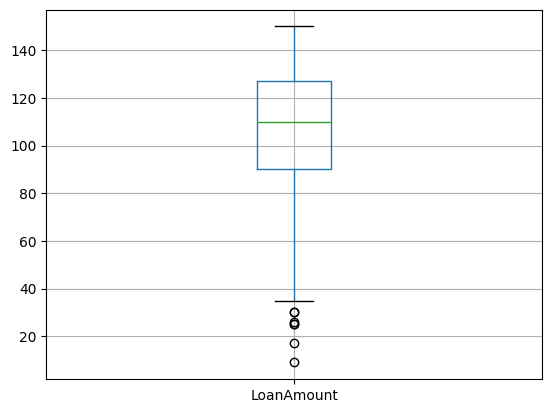

In [58]:
  testdata.boxplot(column='LoanAmount')

<Axes: >

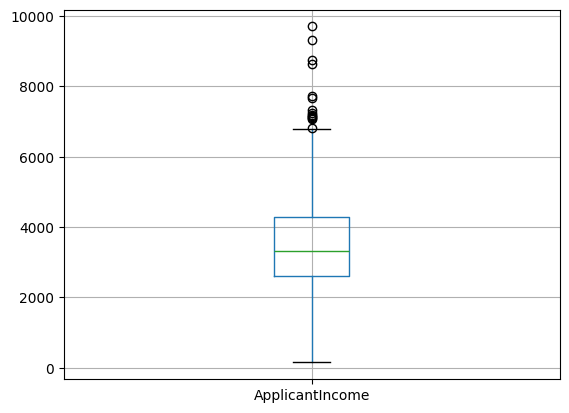

In [59]:
testdata.boxplot(column='ApplicantIncome')

In [60]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [61]:
testdata['LoanAmount_log']= np.log(testdata['LoanAmount'])

In [62]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [63]:
testdata['TotalIncome']= testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log']= np.log(testdata['TotalIncome'])

In [64]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569


In [65]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [66]:
for i in range(0,5):
    test[:,i]= labelencoder_X.fit_transform(test[:,i])

In [67]:
test[:,7]= labelencoder_X.fit_transform(test[:,7])

In [68]:
test

array([[1, 1, 1, ..., 1.0, 4.852030263919617, 287],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 38],
       [1, 1, 0, ..., 1.0, 4.787491742782046, 216],
       ...,
       [0, 0, 0, ..., 1.0, 4.2626798770413155, 27],
       [1, 1, 3, ..., 1.0, 3.6888794541139363, 125],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 168]],
      shape=(381, 8), dtype=object)

# scale data

In [69]:
test = ss.fit_transform(test)

In [70]:
pred= NBClassifier.predict(test)

In [71]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

# Loan Approval Distribution

C:\Users\Pramod Gurav\AppData\Local\Temp\ipykernel_25128\2326439701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=dataset, palette='coolwarm')


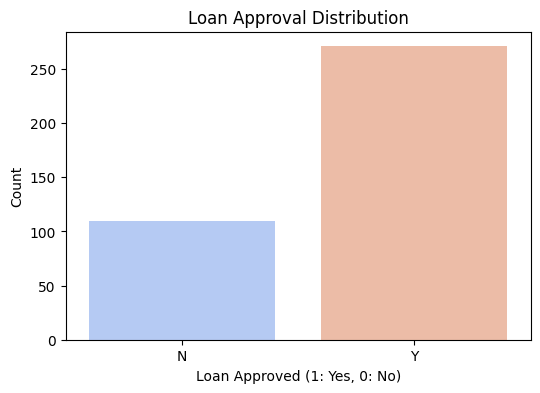

In [72]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=dataset, palette='coolwarm')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Approved (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Loan Approval Based on Credit History

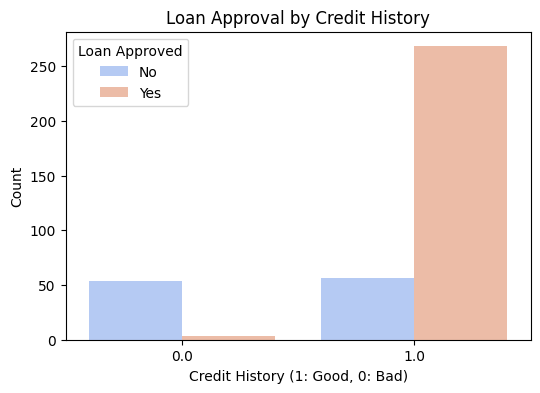

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=dataset, palette='coolwarm')
plt.title('Loan Approval by Credit History')
plt.xlabel('Credit History (1: Good, 0: Bad)')
plt.ylabel('Count')
plt.legend(title="Loan Approved", labels=['No', 'Yes'])
plt.show()

# Loan Approval by Property Area

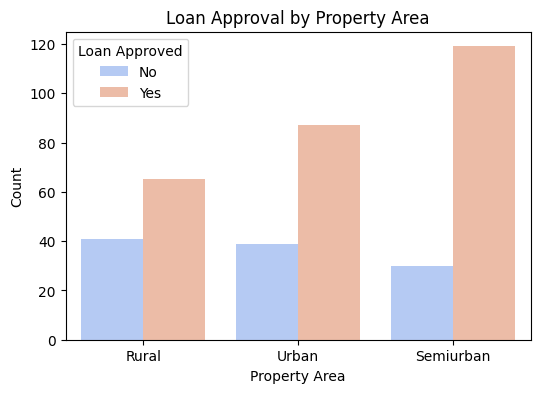

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=dataset, palette='coolwarm')
plt.title('Loan Approval by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title="Loan Approved", labels=['No', 'Yes'])
plt.show()